In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#импорт файлов для Андрея
DATA_FOLDER = 'drive/My Drive/Учеба/Methods and models for multivariate data analysis/Course project/'
DATASET_PATH = DATA_FOLDER + 'Dataset/DelayedFlights.csv'

In [ ]:
#импорт файла для Виктора
DATASET_PATH = 'DelayedFlights.csv'

In [2]:
#импорт файлов локально
import kaggle
import zipfile
import os

#импорт датасета с каггла
!kaggle datasets download -d giovamata/airlinedelaycauses
#распаковка архива
home = os.getcwd()
path = home + 'airlinedelaycauses.zip'
with zipfile.ZipFile(path, 'w') as zip_ref:
    zip_ref.extractall()

DATASET_PATH = home + '\DelayedFlights.csv'

'charmap' codec can't encode characters in position 88-93: character maps to <undefined>


In [3]:
DATASET_PATH

'C:\\Users\\Victor\\OneDrive - ITMO UNIVERSITY\\J4132c\\Методы многомерного анализа данных\\Labs\\DelayedFlights.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

**LAB 2**

by: Victor Voronin (J41321c), Andrey Antonov (J41332c), Nelubin Daniil (J41325c)

## *Step 0* 
Choosing the subsample of our dataset to make further analisys on

ПРОБЛЕМА -- при загрузке всех данных KDE считаются очень медленно, и в целом диаграммы не красивые

In [4]:
# loading and displaying our dataset
dataset = pd.read_csv(DATASET_PATH)
dataset = shuffle(dataset)
dataset = dataset.dropna(how='any', axis='index')


*   Month -- month of the flight
*   DayofMonth -- day of the month (1 to 31)
*   DepTime -- actual departure time
*   CRSElapsedTime -- scheduled elapsed time of the flight
*   CarrierDelay -- delay, in minutes, attributable to the carrier
*   WeatherDelay -- delay, in minutes, attributable to weather factors
*   NASDelay -- delay, in minutes, attributable to the National Aviation System
*   SecurityDelay -- delay, in minutes, attributable to security factors
*   LateAircraftDelay -- delay, in minutes, attributable to late-arriving aircraf
*   ArrDelay -- arrival delay, in minutes





In [7]:
# subset of our dataset with X_keys being the keys of predictor variables and Y_keys is a target variable
X_keys = ['Month', 'DayofMonth', 'DepTime', 'CRSElapsedTime', 'CarrierDelay', 
          'WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay']
Y_keys = ['ArrDelay']

In [8]:
df = dataset[(X_keys + Y_keys)]
df = df[(df['DepTime'] < df['DepTime'].quantile(0.99)) &
        (df['DepTime'] > df['DepTime'].quantile(0.011)) &
        (df['CRSElapsedTime'] < df['CRSElapsedTime'].quantile(0.98)) &
        (df['CarrierDelay'] < df['CarrierDelay'].quantile(0.98)) &
        (df['WeatherDelay'] < df['WeatherDelay'].quantile(0.98)) &
        (df['NASDelay'] < df['NASDelay'].quantile(0.98)) &
        (df['SecurityDelay'] < df['SecurityDelay'].quantile(1)) &
        (df['LateAircraftDelay'] < df['LateAircraftDelay'].quantile(0.98))
       ]
df.head()

,Month,DayofMonth,DepTime,CRSElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
405118,3,27,1735.0,100.0,0.0,0.0,0.0,0.0,49.0,49.0
1635089,11,14,1922.0,70.0,0.0,0.0,0.0,0.0,78.0,78.0
1330870,8,29,2208.0,86.0,0.0,0.0,0.0,0.0,25.0,25.0
1531225,10,13,2218.0,70.0,7.0,0.0,0.0,0.0,10.0,17.0
1869051,12,3,1353.0,120.0,0.0,0.0,0.0,0.0,23.0,23.0


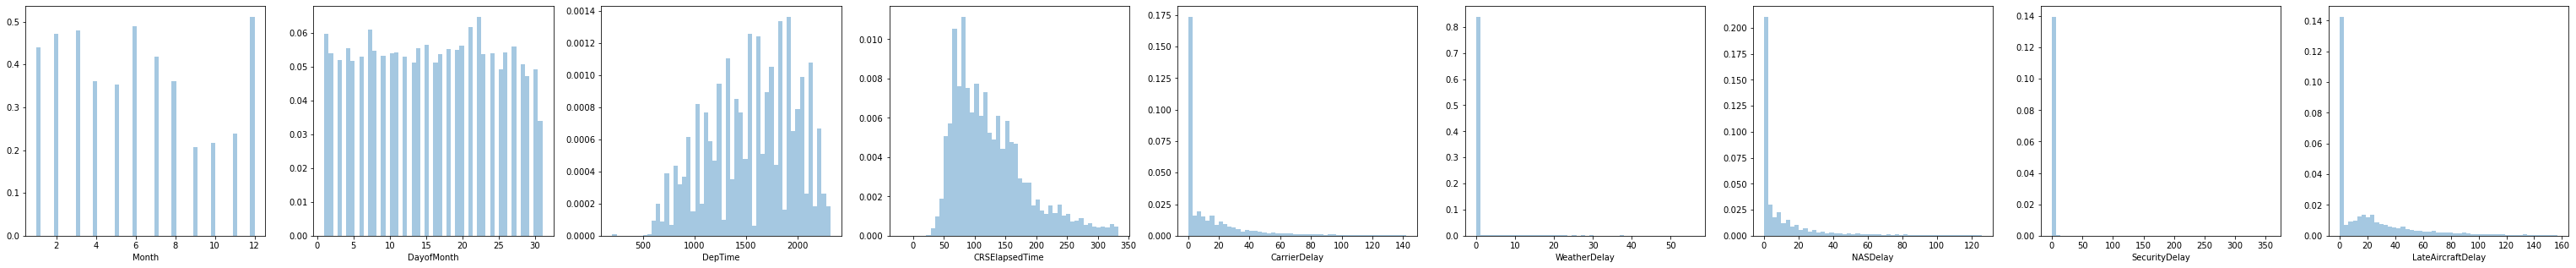

In [253]:
fig, ax = plt.subplots(1, len(X_keys), figsize=(6 * len(X_keys), 5))
for i, key in enumerate(X_keys):
    sns.distplot(df[key], ax=ax[i], kde=False, norm_hist=True)

KeyboardInterrupt: 

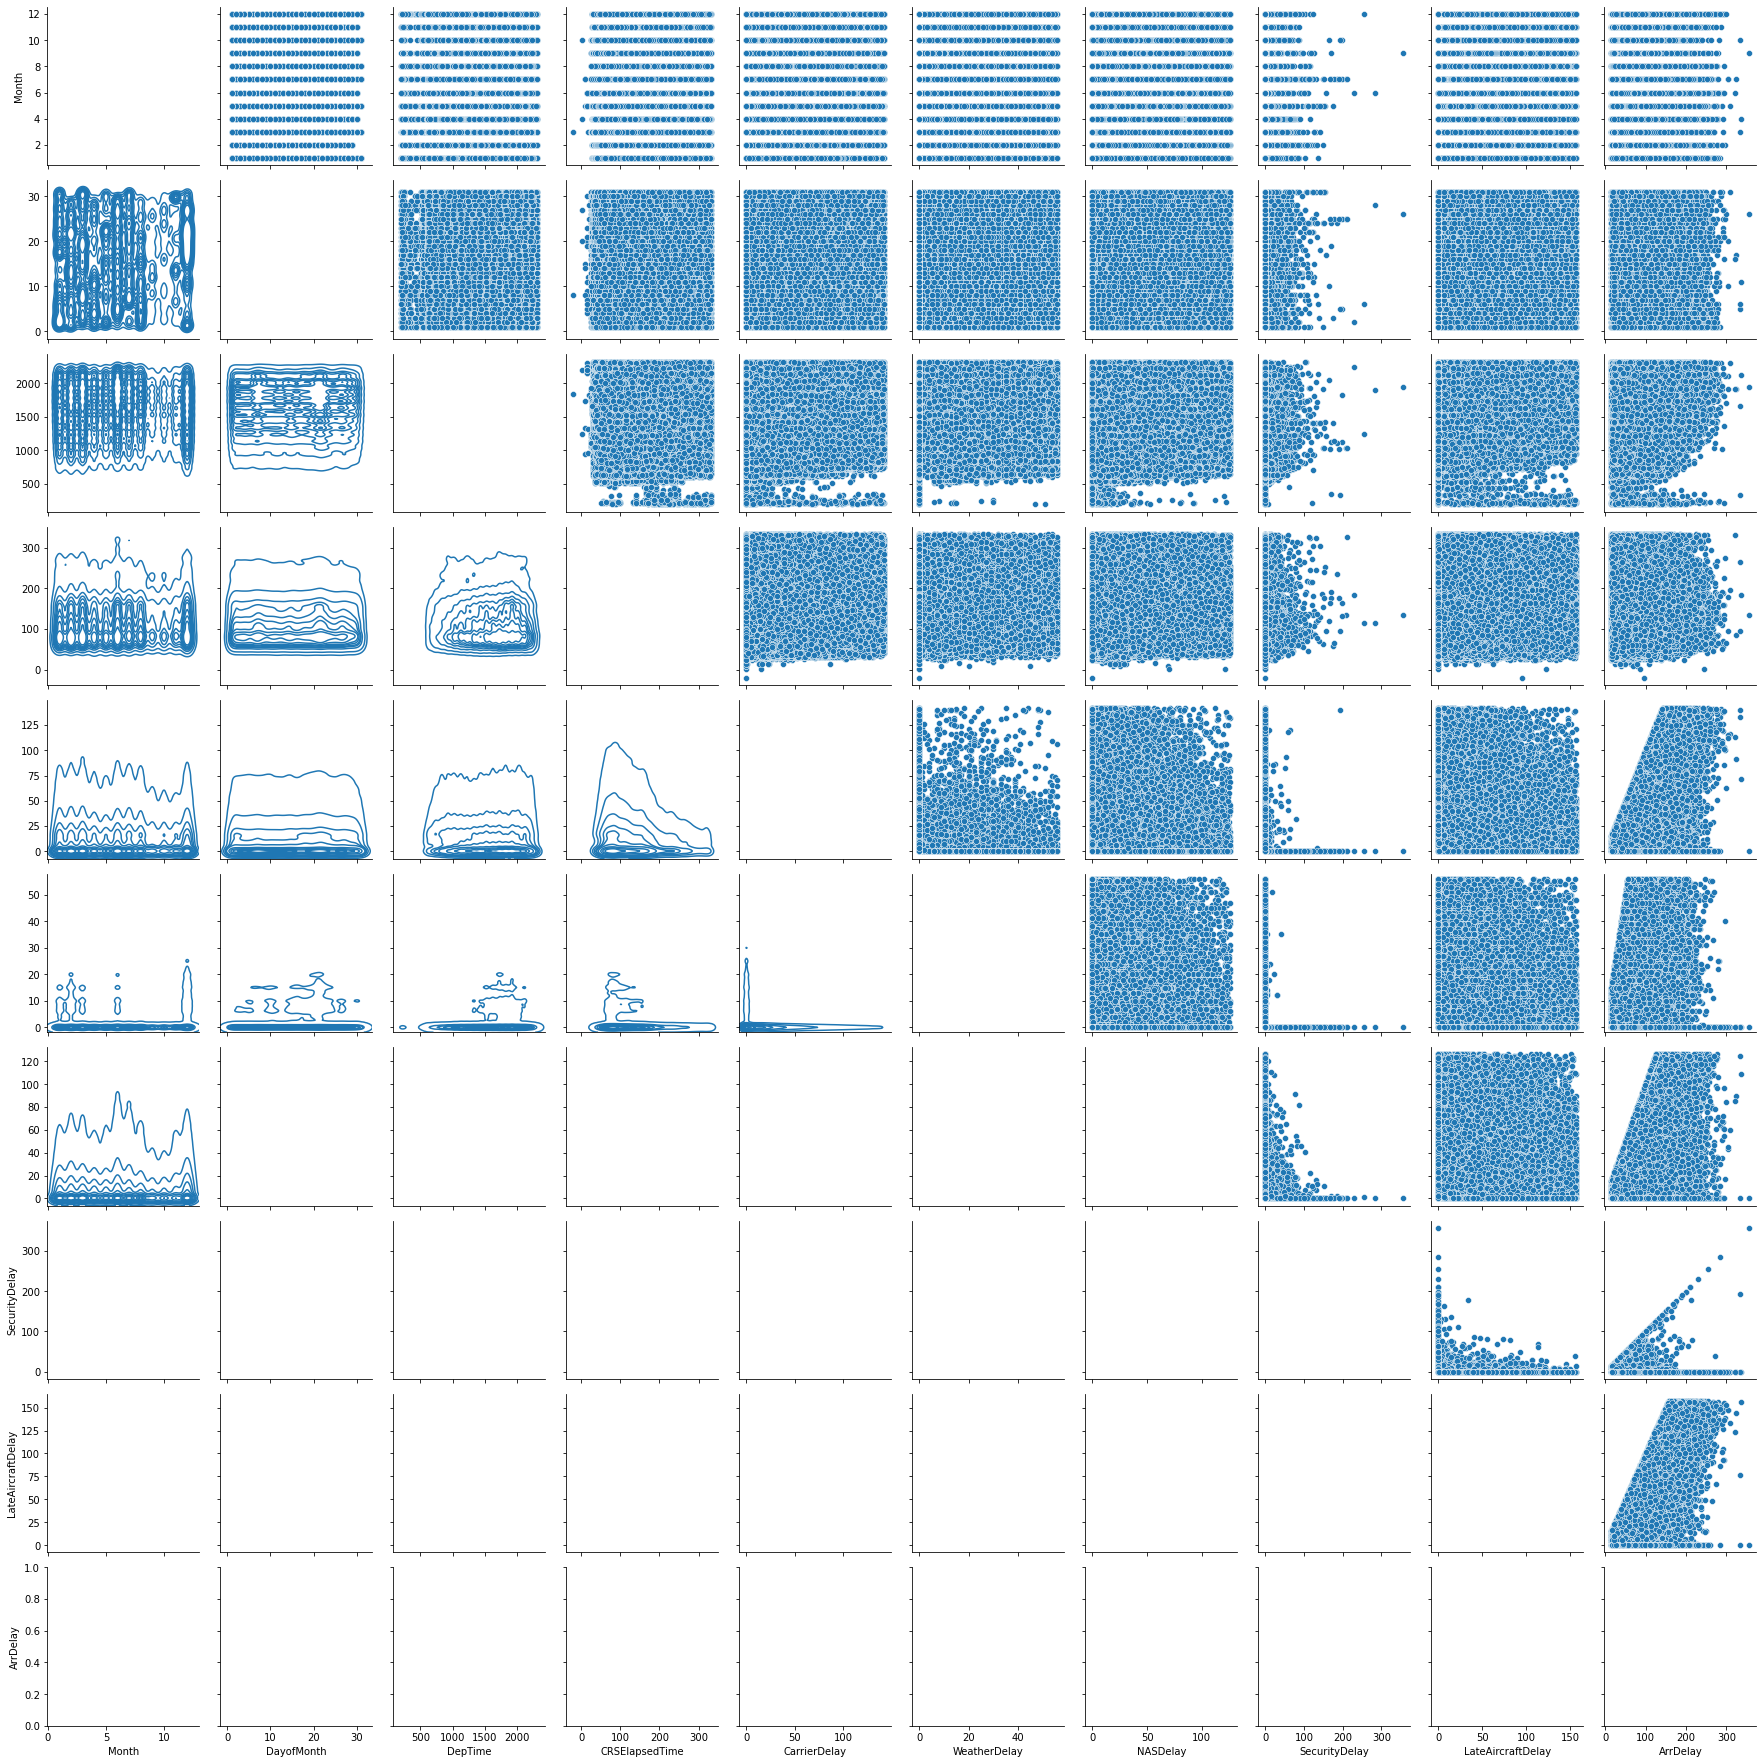

In [254]:
#очень долго выполняется. Не запускать без необходимости
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [ ]:
#определим границы обреза данных через правило трех сигм
key = 'CRSElapsedTime'
perc = 0.98
count, bins, ignored = plt.hist(df[key][df[key] < df[key].quantile(perc)], bins = 100, density=False);
print(len(df[key][df[key] > df[key].quantile(perc)]) / len(df[key] * 100))
print(df[key].quantile(perc))
print(df[key].mean() + 3 * df[key].std(), df[key].mean(), df[key].mean() + 3 * df[key].std())
print(count)

## Step 1
Estimation of the PDF

In [11]:
def join_hist_plot(data, x_dist, y_dist):
    plt.figure(figsize = (24, 7))
    return sns.jointplot(data = data, x=x, y=y, kind="hist");

def join_kde_plot(dataset, x_dist, y_dist):
    plt.figure(figsize = (24, 7))
    sns.jointplot(data=dataset, x=x, y=y, kind="kde");

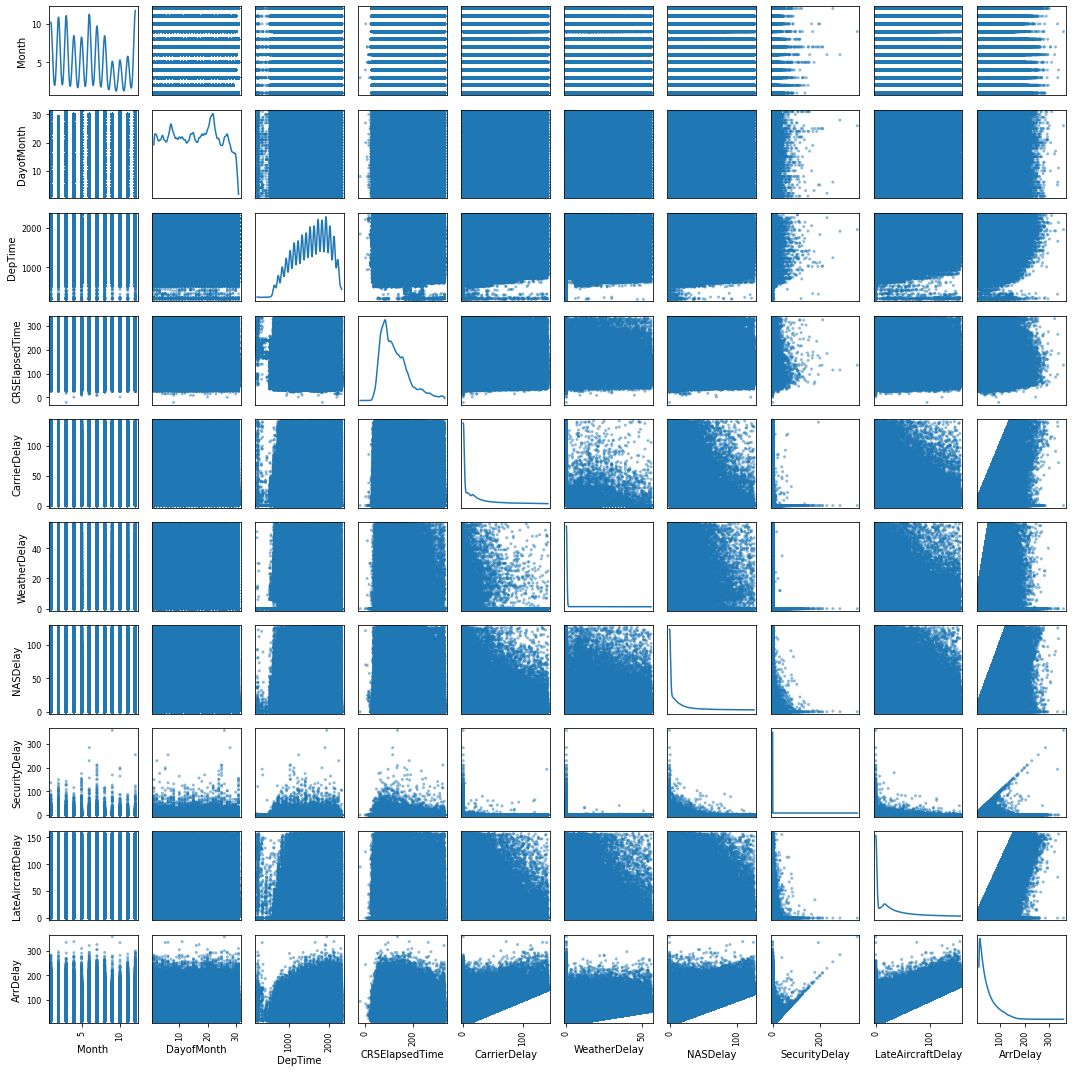

In [55]:
pd.plotting.scatter_matrix(df.loc[:, 'Month' : 'ArrDelay'], diagonal="kde", figsize=(15, 15))
plt.tight_layout()
plt.show()

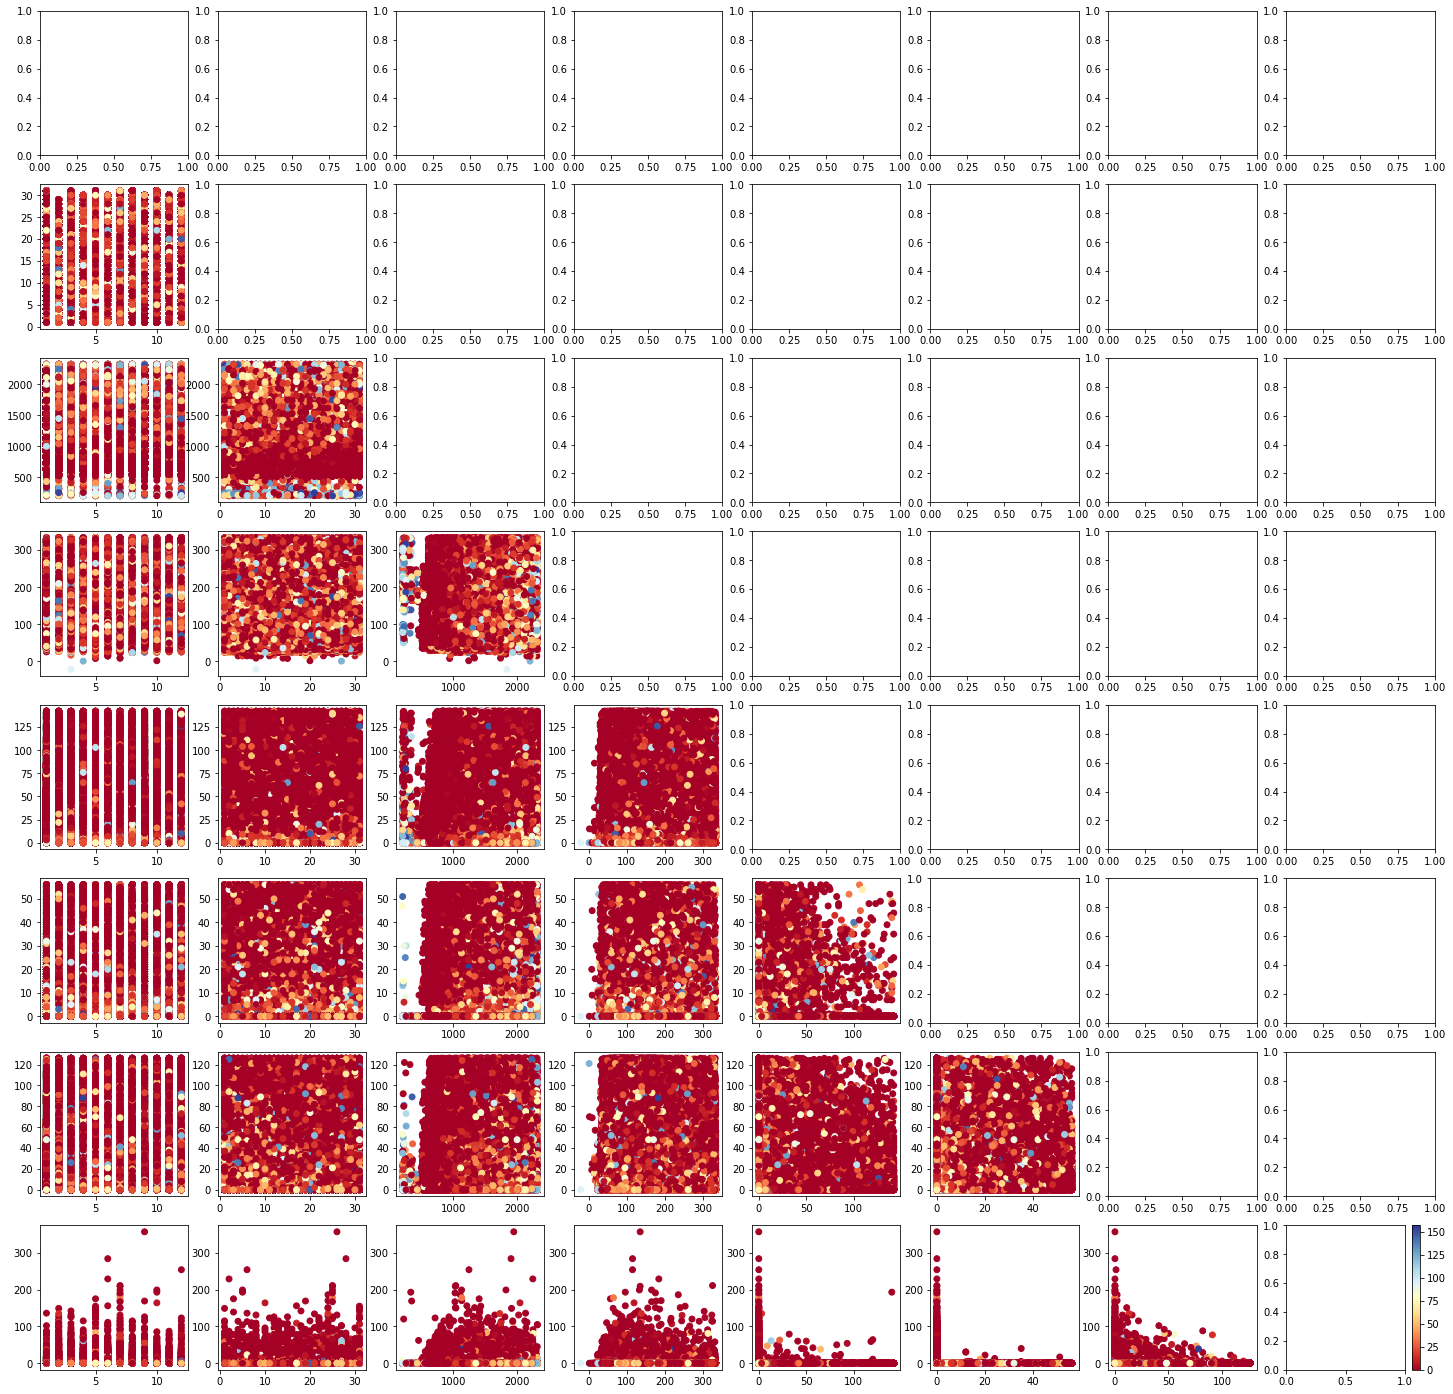

In [307]:
#MRV with ArrDelay colorbar
fig, ax = plt.subplots(8,8, figsize = (25,25))
color_list = df.iloc[:,8]
cm = plt.cm.get_cmap('RdYlBu')
for i in range(8):
    for j in range(8):
        if j > i-1:
            continue
        sc = ax[i,j].scatter(df.iloc[:,j], df.iloc[:,i], c=color_list, s=35, cmap=cm)
        if j == 8:
            ax[i,j].set_xlabel(df.columns[j])
        if i == 0:
            ax[i,j].set_ylabel(df.columns[i])
plt.colorbar(sc)
plt.show();

<Figure size 1728x504 with 0 Axes>

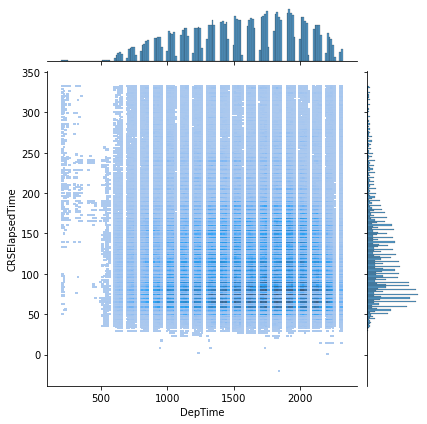

In [12]:
x, y = 'DepTime', 'CRSElapsedTime'
join_hist_plot(df, x, y)

<Figure size 1728x504 with 0 Axes>

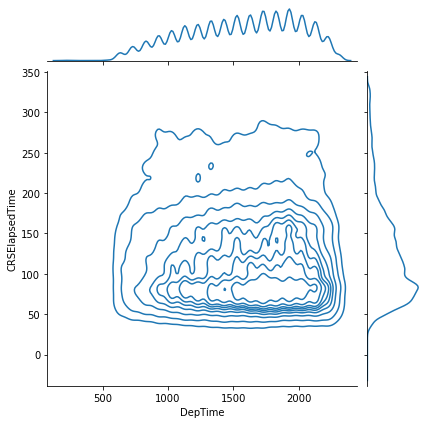

In [49]:
x, y = 'DepTime', 'CRSElapsedTime'
join_kde_plot(df, x, y)

In [ ]:
#pairwise pdf estimation for continious random variables
for x, y in [['DepTime', 'ArrTime'], ['DepTime', 'ActualElapsedTime'], ['DepTime', 'ArrDelay'],
             ['ArrTime', 'ActualElapsedTime'], ['ArrTime', 'ArrDelay'],
             ['ActualElapsedTime', 'ArrDelay']]:
  sns.jointplot(data=dataset[[x, y]], x=x, y=y, kind="hist")
  sns.jointplot(data=dataset[[x, y]], x=x, y=y, kind="kde")

## Step 2
Estimations of the expected value and variance

In [219]:
# expected value and variance for the variables
def expected(index, degree=1):
    a=dataset.pivot_table(index=[index], aggfunc='size')/dataset[index].count()
    return sum(a.index**degree*np.array(a))

def variance(index):
    return expected(index, 2) - expected(index)**2

for inx in X_keys:
    print(f'Expected value for {inx} is {expected(inx):.3f}')
    print(f'Variance for {inx} is {variance(inx):.3f}\n----')

Expected value for Month is 6.065
Variance for Month is 12.313
----
Expected value for DayofMonth is 15.725
Variance for DayofMonth is 77.317
----
Expected value for DepTime is 1558.832
Variance for DepTime is 206415.606
----
Expected value for CRSElapsedTime is 131.764
Variance for CRSElapsedTime is 4834.697
----
Expected value for CarrierDelay is 19.179
Variance for CarrierDelay is 1896.273
----
Expected value for WeatherDelay is 3.703
Variance for WeatherDelay is 461.886
----
Expected value for NASDelay is 15.022
Variance for NASDelay is 1144.676
----
Expected value for SecurityDelay is 0.090
Variance for SecurityDelay is 4.091
----
Expected value for LateAircraftDelay is 25.296
Variance for LateAircraftDelay is 1768.612
----


In [220]:
# mean for the variables
df.apply(np.mean)

Month                   6.061203
DayofMonth             15.702557
DepTime              1557.675565
CRSElapsedTime        126.230962
CarrierDelay           15.308914
WeatherDelay            1.300704
NASDelay               11.692835
SecurityDelay           0.095651
LateAircraftDelay      22.124401
ArrDelay               50.522504
dtype: float64

In [31]:
# standart deviation for the variables
df.apply(np.std)

Month                  3.516234
DayofMonth             8.785815
DepTime              421.362663
CRSElapsedTime        60.209656
CarrierDelay          25.025805
WeatherDelay           6.211203
NASDelay              21.503711
SecurityDelay          2.026746
LateAircraftDelay     31.086816
ArrDelay              34.329649
dtype: float64

## Step 3

In [50]:
cond = pd.DataFrame(columns = df.columns[:-1])

In [36]:
dexp=pd.DataFrame(columns = df.columns[:-1])
for i in set(df['ArrDelay']):
    dexp.loc[i]=df[df.columns[:-1]].loc[df['ArrDelay'] == i].apply(np.mean)
dexp

,Month,DayofMonth,DepTime,CRSElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
15.0,6.081177,15.695619,1475.370881,122.797911,6.384579,0.426682,2.446377,0.102607,5.639755
16.0,6.085253,15.711426,1476.812365,123.129947,6.649504,0.466562,2.700827,0.099790,6.083317
17.0,6.060566,15.737445,1478.528964,123.673937,6.990092,0.495857,3.002536,0.096209,6.415306
18.0,6.053121,15.692020,1483.892040,123.146693,7.169047,0.561157,3.323913,0.097521,6.848362
19.0,6.080368,15.737161,1486.680383,124.099996,7.510831,0.572856,3.640127,0.090932,7.185254
...,...,...,...,...,...,...,...,...,...
325.0,7.000000,17.000000,1910.000000,85.000000,91.000000,0.000000,90.000000,0.000000,144.000000
333.0,10.000000,5.000000,330.000000,96.000000,140.000000,0.000000,0.000000,193.000000,0.000000
334.0,3.000000,6.000000,1658.000000,264.000000,133.000000,0.000000,125.000000,0.000000,76.000000
337.0,4.000000,11.000000,2128.000000,184.000000,72.000000,0.000000,109.000000,0.000000,156.000000


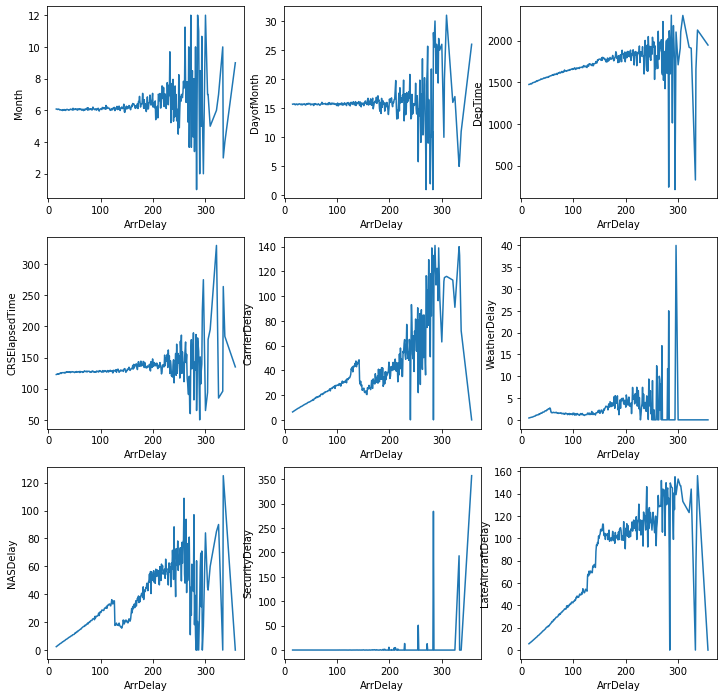

In [288]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].plot(dexp.iloc[:,k])
        ax[i,j].set_ylabel(dexp.columns[k])
        ax[i,j].set_xlabel('ArrDelay')
        k+=1

In [58]:
dvar = pd.DataFrame(columns = df.columns[:-1])
for i in set(df['ArrDelay']):
    dvar.loc[i]=df[df.columns[:-1]].loc[df['ArrDelay'] == i].apply(np.var)
    
dvar

,Month,DayofMonth,DepTime,CRSElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
15.0,11.926500,76.510180,178438.034805,3667.082093,39.283200,5.262552,15.199908,1.223375,39.266133
16.0,11.938391,76.023439,179225.385151,3691.649584,43.874232,6.047661,17.229620,1.271232,44.678659
17.0,11.962819,76.577036,177998.757429,3662.589703,49.151943,6.780706,20.685429,1.298884,49.894242
18.0,11.944538,76.097340,178700.595034,3617.023464,54.579932,8.031645,24.236643,1.345479,56.095267
19.0,12.051497,76.140794,178102.044164,3643.130288,59.968736,8.567379,27.718106,1.320021,61.794417
...,...,...,...,...,...,...,...,...,...
325.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
333.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
334.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
337.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


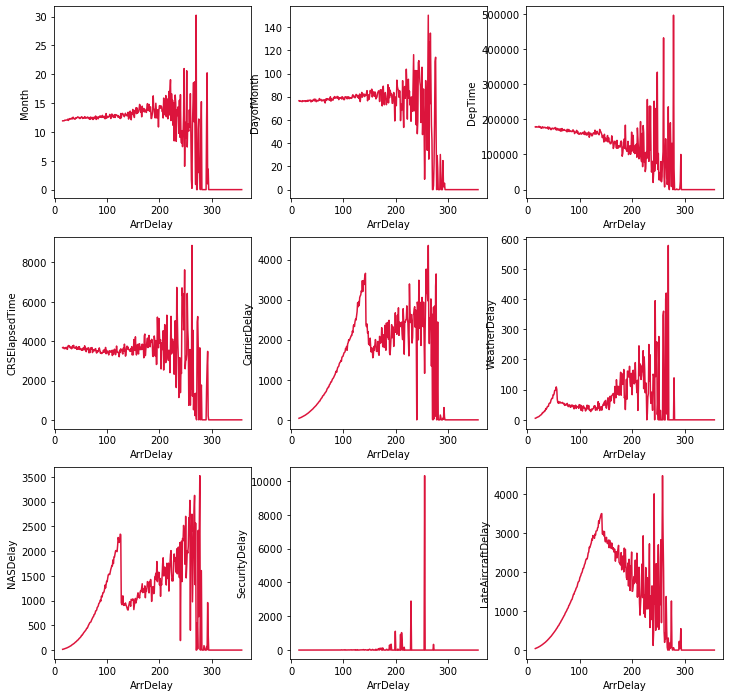

In [290]:
fig, ax = plt.subplots(3,3,figsize=(12,12))
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].plot(dvar.iloc[:,k], color = 'Crimson')
        ax[i,j].set_ylabel(dvar.columns[k])
        ax[i,j].set_xlabel('ArrDelay')
        k+=1

## Step 4

Estimating paired correlation coefficients, confidence intervals and significance levels 

In [236]:

for key_i in df.columns:
  x = df[key_i].apply(lambda x: float(x))
  for key_j in df.columns:
    if key_i == key_j: continue
    
    y = df[key_j].apply(lambda x: float(x))
    r, p = st.pearsonr(x,y)
    r_z = np.arctanh(r)

    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = st.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    print(f'{key_i} - {key_j}')
    print(f'p:\t{p:.3f}')
    print(f'corr:\t{r:.3f}')
    print(f'Conf interval:\t{lo_z:.3f}  {hi_z:.3f}\n')

Month - DayofMonth
p:	0.000
corr:	0.065
Conf interval:	0.063  0.067

Month - DepTime
p:	0.000
corr:	-0.011
Conf interval:	-0.012  -0.009

DayofMonth - Month
p:	0.000
corr:	0.065
Conf interval:	0.063  0.067

DepTime - Month
p:	0.000
corr:	-0.011
Conf interval:	-0.012  -0.009

CRSElapsedTime - Month
p:	0.000
corr:	0.004
Conf interval:	0.002  0.005

CarrierDelay - Month
p:	0.000
corr:	-0.003
Conf interval:	-0.005  -0.001

WeatherDelay - Month
p:	0.000
corr:	0.006
Conf interval:	0.005  0.008

NASDelay - Month
p:	0.000
corr:	0.018
Conf interval:	0.017  0.020

SecurityDelay - Month
p:	0.000
corr:	-0.003
Conf interval:	-0.005  -0.002

LateAircraftDelay - Month
p:	0.326
corr:	-0.001
Conf interval:	-0.003  0.001

ArrDelay - Month
p:	0.000
corr:	0.009
Conf interval:	0.007  0.011



## Step 5
Estimate multivariate correlation

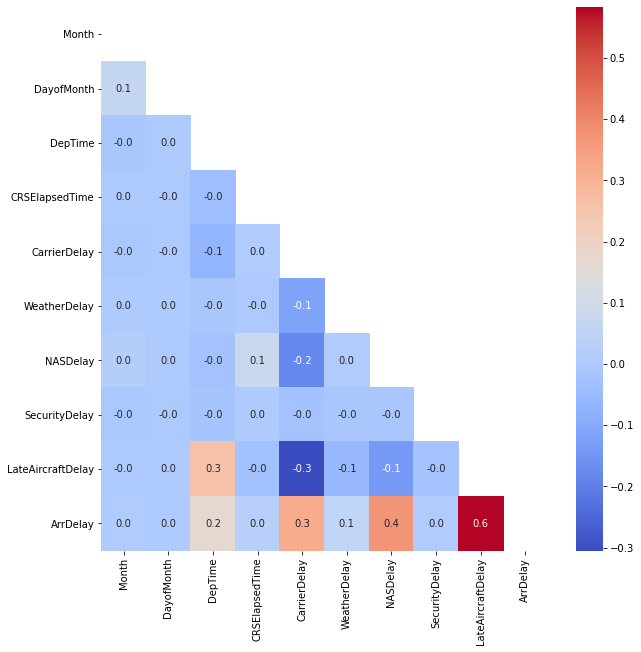

In [184]:
# building a correlation matrix
data_corr = df.copy()
corr = data_corr.corr()

#создаем маску нижней треугольной матрицы для заполнения
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'coolwarm');

Correlation atrix shows there is not mostly multicollinearity between predictors. There is a little direct correlation between LateAircraftDelay and DepTime

## Step 6
Choosing a task formulation for regression and building a regression model


In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import  LassoLarsIC

In [246]:
# predictors and target variable

#predictors
#exclude DepTime and CarrierDelay because they have correlation with other predictors
#normalize data

X = df.loc[:, ['Month', 'DayofMonth', 'CarrierDelay', 'LateAircraftDelay','NASDelay', 'WeatherDelay']]
# target -- ArrDelay
Y = df.iloc[:, -1]

# train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [247]:
# create, train and forecast with a linear regression model
reg = LinearRegression(normalize=True)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [248]:
#let's see our results in the two last columns
pd.concat([X_test, pd.DataFrame(Y_pred, index = X_test.index, columns = ['ArrDelay_pred']), Y_test], axis = 1)

,Month,DayofMonth,LateAircraftDelay,NASDelay,WeatherDelay,SecurityDelay,ArrDelay_pred,ArrDelay
1701279,11,30,74.0,47.0,5.0,0.0,115.563507,126.0
678849,4,28,33.0,11.0,4.0,0.0,59.072124,48.0
62490,1,23,23.0,0.0,0.0,0.0,41.921802,23.0
829143,5,3,47.0,0.0,0.0,0.0,59.202855,65.0
297787,2,15,16.0,3.0,0.0,0.0,39.064624,19.0
...,...,...,...,...,...,...,...,...
1780732,12,4,15.0,3.0,0.0,0.0,38.367953,18.0
395597,3,20,23.0,11.0,0.0,0.0,50.001093,34.0
1435286,9,14,28.0,0.0,0.0,0.0,45.546076,28.0
1012148,6,28,10.0,24.0,0.0,0.0,50.203806,34.0


## Step 7
Analizyng the quality of the regression

In [249]:
print(f'Linear regression score:\t{reg.score(X_test, Y_test):.3f}')
print(f'Lasso regression score:\t{clf.score(X_test, Y_test):.3f}')

0.5581383595032772

In [206]:
max_err = max_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared = False)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('Linear regression')
print(f'Max_err\t= {max_err:.3f}')
print(f'RMSE \t= {rmse:.3f}')1
print(f'MAPE \t= {mape:.3f}')

Max_err	= 2.7853275241795927e-12
RMSE 	= 3.988047389719877e-13
MAPE 	= 6.813394903841156e-13


In [ ]:
max_err_lasso = max_error(Y_test, Y_pred_lasso)
rmse_lasso = mean_squared_error(Y_test, Y_pred_lasso, squared = False)
mape_lasso = mean_absolute_percentage_error(Y_test, Y_pred_lasso)
print('Linear regression')
print(f'Max_err\t= {max_err_lasso:.3f}')
print(f'RMSE \t= {rmse_lasso:.3f}')
print(f'MAPE \t= {mape_lasso:.3f}')

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(X_test.iloc[:,0], Y_test, label = 'Observed values')
plt.scatter(X_test.iloc[:,0], Y_pred_lasso, label = 'Predict values')
plt.xlabel('Month')
plt.ylabel('ArrDelay')
plt.legend(loc = 'upper left')
plt.show();

In [ ]:
# Plotting the distribution of residuals
y1 = np.array(Y_test)
y2 = np.array(Y_pred)
y_diff = y1 - y2
sns.distplot(y_diff, kde=True, norm_hist=True)
y_diff

# Draft

In [ ]:
xname = 'DepTime'
yname = 'ArrDelay'
xdata = df[xname]
ydata = df[yname]
x = sorted(xdata)
y = sorted(ydata)

X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

mu = 
cov = np.cov([x,y])а
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
fig.show()

In [56]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [59]:
dcon = pd.DataFrame(columns = sorted(df['ArrDelay'].unique()))
for i in set(df['ArrDelay']):
    dcon.loc[:, i] = df[df['Month']].loc[df['ArrDelay'] == i & df['Month'] == j].shape[0] / df['ArrDelay'].shape[0]
    
dcon

,121.0,29.0,72.0,64.0,71.0,48.0,30.0,42.0,58.0,20.0,...,325.0,278.0,269.0,294.0,289.0,300.0,333.0,334.0,321.0,357.0


In [89]:
a = [[0,0],
     [0,0],
     [0,1],
     [0,1],
     [0,1],
     [1,0],
     [1,1],
     [1,1]
    ]
df_test = pd.DataFrame(a, columns = ['x','y'])
df_test
#расчет условного распределения
qwe = pd.DataFrame()
for j in set(df_test['y']):
    for i in set(df_test['x']):
        e = df_test.loc[(df_test['x'] == i) & (df_test['y'] == j)]
        r = df_test.loc[df_test['y'] == j]
        qwe.loc[i, j] = e.shape[0] / r.shape[0]
qwe

,0,1
0,0.666667,0.6
1,0.333333,0.4
